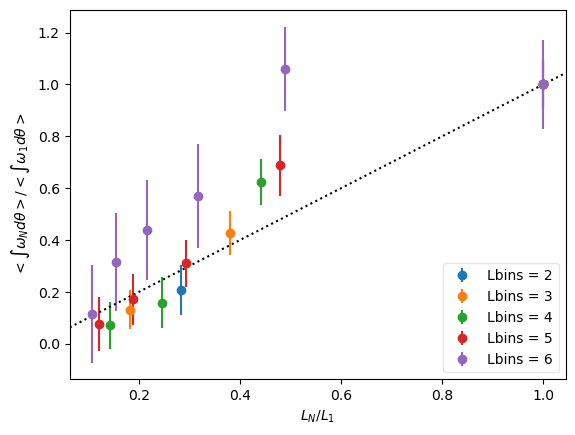

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

fig, ax = plt.subplots()

nbootstrap = 100
names = ['int_ratio','L_ratio','int_std']
colors = ['C00','C01','C02','C03','C04','C05']
labels = ['Lbins = 2','Lbins = 3','Lbins = 4','Lbins = 5','Lbins = 6']
nquants = [2,3,4,5,6]

for nquant,c in zip(nquants,colors[:len(nquants)]):
    filename = f'../data/int_L_nq{nquant}_nbs{nbootstrap}.npz'
    data = ascii.read(filename)#,names=names)
    ax.errorbar(data['L_ratio'],data['int_ratio'],yerr=data['int_std'],c=c,fmt='o')

ax.axline((1,1),slope=1,c='k',ls=':')
ax.set_ylabel(r'$<\int\omega_Nd\theta>/<\int\omega_1d\theta>$')
ax.set_xlabel(r'$L_N/L_1$')

#Legend
handles = [plt.errorbar([],[],yerr=1,color=colors[:len(nquants)][i],fmt='o') \
           for i in range(len(nquants))]#,\
labels_ = labels[:len(nquants)]
plt.legend(handles, labels_, loc=4, fancybox=True, framealpha=0.5)

plotname = f'int_L_nquant{nquant}.png'
plt.savefig('../plots/'+plotname)

plt.show()